DATASET: - The dataset contains survey data coming from a pool of participants that answered various
questions regarding their running habits.
# OBJECTIVE:
In the Code file below we have taken the given dataset done the EDA to find out if there exist a pattern or key factors which we can use for the clustering analysis we need to do
based on the key findings and according to the need of the company, tried to give recommendations best to my knowledge on the basis of the cluster analysis.
Used KMeans Clustering because of following resons:
> We do not have predefined consumer segments or labels. K-Means can independently identify groups.

>The survey has both categorical choices (country, gender etc) as well as numeric ratings. By one-hot encoding categories, K-Means can handle mixed data.
Other algorithms studied for this project include DBSCAN and Hirerchical Clustering however, Due to scalaability and ease of segment profiling we ahed with kmeans clustering algorithm.

##In the following code file you can find:

> EDA Graphs: we back the thaught behind clustering perticular factors and providing specific recommendations

> Data Preprocessing: Processing data to be used as human redable and easy to cluster

>Correlation Plot: which we used to correlated polints with wich we will do the clustering

>similarity matrix clculation: we have used cosine similarity to find which are the key traits we can cluster our data on

>This code contains 5 key clusters and recommendations on each cluster based on the cluster analysis.

##Team Members:
* Soham Balkrishna Palnitkar
* Hrishikesh Date







In [3]:
from google.colab import files
import pandas as pd
import numpy as np
# Imports

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans


In [4]:
# Upload files
uploaded = files.upload()

dataset_df = pd.read_csv("dataset.csv")


Saving dataset.csv to dataset.csv


EDA

In [5]:
# Keep only valid respondents
# Filter invalid records by id
invalid_ids = dataset_df.loc[dataset_df['S2r2'] == 1, 'id']
df = dataset_df[~dataset_df['id'].isin(invalid_ids)]

print(df.shape)
print(df['S2r2'].sum())

(149, 47)
0


In [6]:
print(df.head())

   record       id  S1r1  S1r2  S1r3  S2r1  S2r2  S3r1  S3r2  S4r1  ...  Q6r1  \
0       1  9731743     1     0     0     1     0     1     0     0  ...     0   
1       2  5917428     0     0     1     1     0     1     0     0  ...     0   
2       3  2459391     0     0     1     1     0     0     1     0  ...     0   
3       4  3277896     0     0     1     1     0     0     1     0  ...     0   
4       5  4986375     1     0     0     1     0     0     1     1  ...     0   

   Q6r2  Q6r3  Q6r4  Q6r5  Q7r1  Q7r2  Q7r3  Q7r4  Q7r5  
0     1     0     1     0     0     0     1     1     0  
1     1     0     0     0     0     0     1     0     0  
2     0     0     0     1     0     1     1     0     0  
3     0     0     0     1     0     1     0     0     0  
4     0     0     0     1     1     0     0     0     0  

[5 rows x 47 columns]


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 174
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   record  149 non-null    int64
 1   id      149 non-null    int64
 2   S1r1    149 non-null    int64
 3   S1r2    149 non-null    int64
 4   S1r3    149 non-null    int64
 5   S2r1    149 non-null    int64
 6   S2r2    149 non-null    int64
 7   S3r1    149 non-null    int64
 8   S3r2    149 non-null    int64
 9   S4r1    149 non-null    int64
 10  S4r2    149 non-null    int64
 11  S4r3    149 non-null    int64
 12  S4r4    149 non-null    int64
 13  S4r5    149 non-null    int64
 14  S4r6    149 non-null    int64
 15  Q1r1    149 non-null    int64
 16  Q1r2    149 non-null    int64
 17  Q1r3    149 non-null    int64
 18  Q2r1    149 non-null    int64
 19  Q2r2    149 non-null    int64
 20  Q2r3    149 non-null    int64
 21  Q2r4    149 non-null    int64
 22  Q3r1    149 non-null    int64
 23  Q3r2    149 non

In [8]:
# Summary Statistics
print(df.describe())

           record            id        S1r1        S1r2        S1r3   S2r1  \
count  149.000000  1.490000e+02  149.000000  149.000000  149.000000  149.0   
mean    88.436242  5.172013e+06    0.657718    0.167785    0.174497    1.0   
std     50.842141  2.665232e+06    0.476074    0.374936    0.380816    0.0   
min      1.000000  1.035396e+06    0.000000    0.000000    0.000000    1.0   
25%     46.000000  2.803133e+06    0.000000    0.000000    0.000000    1.0   
50%     88.000000  5.139211e+06    1.000000    0.000000    0.000000    1.0   
75%    132.000000  7.329953e+06    1.000000    0.000000    0.000000    1.0   
max    175.000000  9.973724e+06    1.000000    1.000000    1.000000    1.0   

        S2r2        S3r1        S3r2        S4r1  ...        Q6r1        Q6r2  \
count  149.0  149.000000  149.000000  149.000000  ...  149.000000  149.000000   
mean     0.0    0.489933    0.510067    0.221477  ...    0.181208    0.167785   
std      0.0    0.501585    0.501585    0.416641  ... 

Data Preprocessing

In [15]:
column_names = {
    'S2r1': 'valid',
    'S2r2': 'invalid',

    'S1r1': 'united_states',
    'S1r2': 'united_kingdom',
    'S1r3': 'japan',

    'S3r1': 'male',
    'S3r2': 'female',

    'S4r1': 'under_18',
    'S4r2': 'age_18_24',
    'S4r3': 'age_25_34',
    'S4r4': 'age_35_44',
    'S4r5': 'age_45_54',
    'S4r6': 'over_55',

    # Questions
    'Q1r1': 'run_occasionally',
    'Q1r2': 'run_regularly',
    'Q1r3': 'run_frequently',

    'Q2r1': 'own_1_shoe',
    'Q2r2': 'own_2_shoes',
    'Q2r3': 'own_3_shoes',

    'Q3r1': 'cushioning_unsure',
    'Q3r2': 'cushioning_foam',
    'Q3r3': 'cushioning_rubber',
    'Q3r4': 'cushioning_foam_rubber',

    'Q4r1': 'dont_race',
    'Q4r2': 'use_training_shoe_to_race',
    'Q4r3': 'race_rubber_spikes',
    'Q4r4': 'race_foam_spikes',
    'Q4r5': 'race_carbon_plated_shoes',

    'Q5r1': 'activities_yoga_pilates',
    'Q5r2': 'no_other_activities',
    'Q5r3': 'activity_spinning',
    'Q5r4': 'activity_strength_training',
    'Q5r5': 'activity_swimming',
    'Q5r6': 'activity_hiking',

    'Q6r1': 'no_complaints',
    'Q6r2': 'wear_out_quickly',
    'Q6r3': 'feel_too_narrow',
    'Q6r4': 'too_heavy',
    'Q6r5': 'poor_style',

    'Q7r1': 'color_bright_bold',
    'Q7r2': 'color_soft_pastels',
    'Q7r3': 'color_earth_tones',
    'Q7r4': 'color_neutral',
    'Q7r5': 'no_color_preference'
}
df = df.rename(columns=column_names)

Data Visualizations

Text(0.5, 1.0, 'Comparison of Complaint Responses')

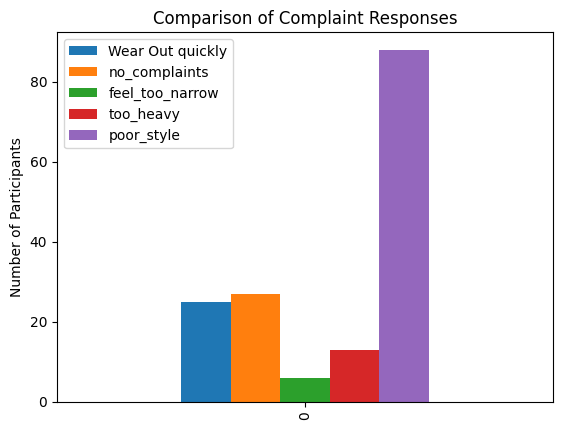

In [16]:
no_complaints = df.groupby('id')['no_complaints'].sum() == 1
wear_out_quick = df.groupby('id')['wear_out_quickly'].sum() == 1
feel_too_narrow = df.groupby('id')['feel_too_narrow'].sum() == 1
too_heavy = df.groupby('id')['too_heavy'].sum() == 1
poor_style = df.groupby('id')['poor_style'].sum() == 1


plot_data = pd.DataFrame({
    'Wear Out quickly': wear_out_quick.sum(),
    'no_complaints': no_complaints.sum(),
    'feel_too_narrow': feel_too_narrow.sum(),
    'too_heavy': too_heavy.sum(),
    'poor_style': poor_style.sum()

}, index=[0])

# Plot side-by-side bars
ax = plot_data.plot(kind='bar')
ax.set_ylabel("Number of Participants")

plt.title("Comparison of Complaint Responses")

visualization showing comarison of the complain responses from participants here we can see styling is key factor that company should address

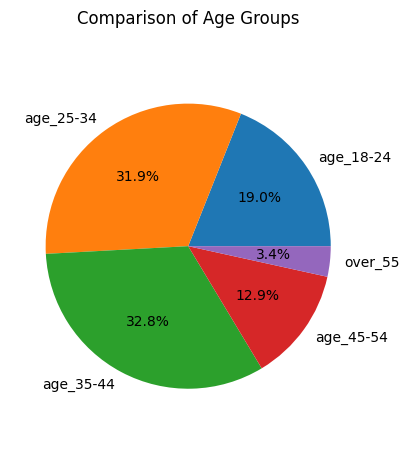

In [17]:
age_18_24 = df.groupby('id')['age_18_24'].sum()==1
age_25_34 = df.groupby('id')['age_25_34'].sum()==1
age_35_44 = df.groupby('id')['age_35_44'].sum()==1
age_45_54 = df.groupby('id')['age_45_54'].sum()==1
age_55_above = df.groupby('id')['over_55'].sum()==1



plot_data = pd.DataFrame({
    "age_18-24": age_18_24.sum(),
    "age_25-34": age_25_34.sum(),
    "age_35-44": age_35_44.sum(),
    "age_45-54": age_45_54.sum(),
    "over_55": age_55_above.sum()
}, index=[0])

plt.pie(
    plot_data.values.flatten(),
    labels=plot_data.columns,
    autopct="%1.1f%%"
)
plt.title("Comparison of Age Groups")
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

Pie chart showing destribution of participants based on their age groups we can observe that mejority of the participants are young-adults which alighs with the complain for styling of the shoes in the previous plot

Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix for Features')

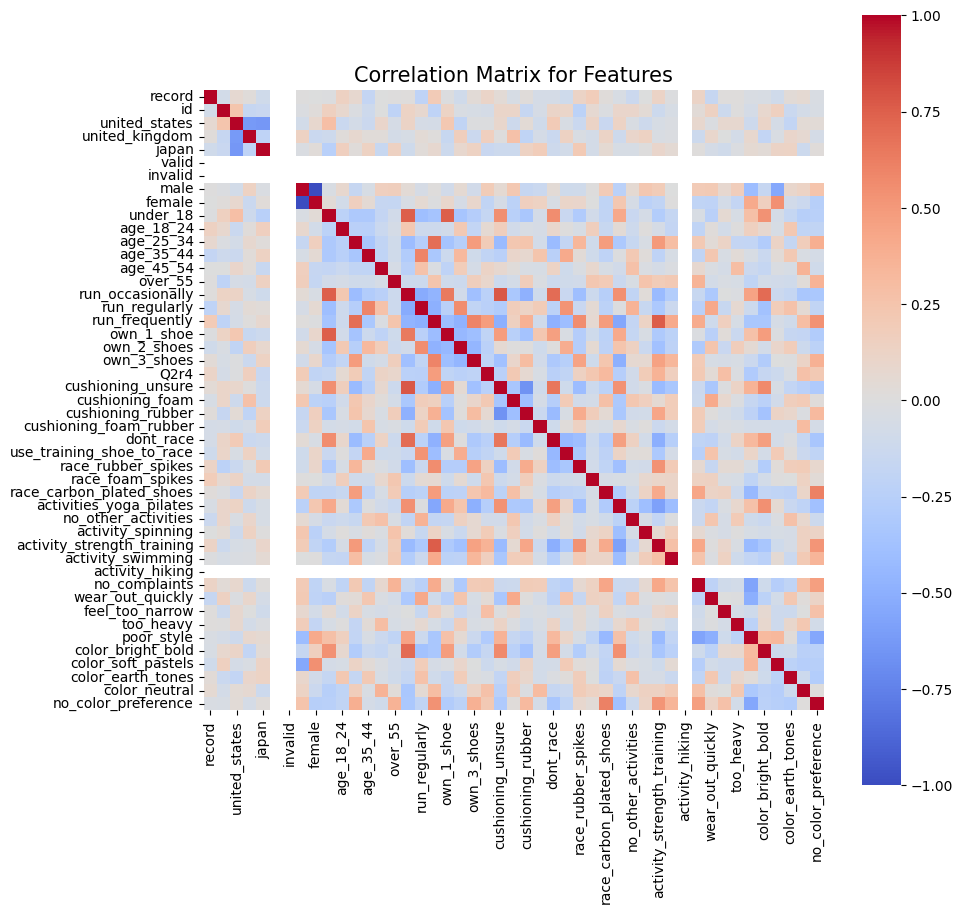

In [18]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
plt.title("Correlation Matrix for Features", fontsize=15)

correlation matrix showing highly correlated points not considering valid and invalid in correlation as it is not a relevant field to correlate with the data collected

In [ ]:
corr = df.corr()
print(corr)

Similartiy Matrix

In [32]:

from sklearn.metrics.pairwise import cosine_similarity
X = df[['run_frequently', 'own_3_shoes', 'male']]

# Calculate cosine similarity
similarity = cosine_similarity(X)

# Convert similarity scores to dataframe
sim_df = pd.DataFrame(similarity)

print(sim_df)

     0    1         2    3    4         5    6         7    8    9    ...  \
0    1.0  1.0  0.000000  0.0  0.0  0.577350  0.0  0.577350  0.0  1.0  ...   
1    1.0  1.0  0.000000  0.0  0.0  0.577350  0.0  0.577350  0.0  1.0  ...   
2    0.0  0.0  1.000000  0.0  0.0  0.816497  0.0  0.816497  0.0  0.0  ...   
3    0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...   
4    0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  ...   
..   ...  ...       ...  ...  ...       ...  ...       ...  ...  ...  ...   
144  0.0  0.0  1.000000  0.0  0.0  0.816497  0.0  0.816497  0.0  0.0  ...   
145  0.0  0.0  1.000000  0.0  0.0  0.816497  0.0  0.816497  0.0  0.0  ...   
146  0.0  0.0  1.000000  0.0  0.0  0.816497  0.0  0.816497  0.0  0.0  ...   
147  0.0  0.0  0.707107  0.0  0.0  0.577350  0.0  0.577350  0.0  0.0  ...   
148  0.0  0.0  1.000000  0.0  0.0  0.816497  0.0  0.816497  0.0  0.0  ...   

          139  140       141       142       143       144       145  \
0  

Since our features are a mix of binary categorical values and hot-encoded columns, a cosine similarity metric would be appropriate as it measures the cosine of the angle between two non-zero vectors. This allows us to compare survey responses in multi-dimensional space.

Cosine similarity also normalizes for the vector lengths, so frequent runners with lots of "1" values don't dominate - instead it focuses on the pattern alignment.



based on the boservations we can conclude that following traits are keys we can provide recommendations on
Key traits to describe:


*   Training habits
* Desired shoe features
* Interest in fashion/style
* Likely personas (professionals, hobbyists, etc)



KMeans Clustering

In [52]:
#0. test Cluster
X = df[['run_occasionally', 'own_2_shoes','color_bright_bold']]

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

df['kmeans_cluster'] = clusters
stats_by_cluster1 = df.groupby('kmeans_cluster').agg({
    'run_occasionally': 'mean',
    'own_2_shoes': ['mean', 'count'],
    'color_bright_bold': ['mean', 'sum']
})

print(stats_by_cluster1)
# Get cluster label mapping
cluster_labels = df['kmeans_cluster'].unique()
print(cluster_labels)

# Profile first cluster
first_cluster = cluster_labels[0]
profile = df[df['kmeans_cluster'] == first_cluster]

# Describe
print(profile['run_occasionally'].value_counts())

if profile['run_occasionally'].mean() > 0.8:
   print('Frequent runners')



mapping = {0: 'Fitness Focused', 1: 'Occasional Runners', 2: 'Fashion Focused'}
print(f"Cluster {mapping[0]} has {stats_by_cluster1.loc[0]['own_2_shoes']['count']} responses")

# Recommendations
if stats_by_cluster1.loc[2, 'color_bright_bold']['mean'] > 0.7:
    print(f"Offer seasonal shoe colors for {mapping[2]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               run_occasionally own_2_shoes       color_bright_bold    
                           mean        mean count              mean sum
kmeans_cluster                                                         
0                      0.139535    1.000000    43          0.000000   0
1                      1.000000    0.181818    44          0.681818  30
2                      0.000000    0.000000    62          0.000000   0
[0 2 1]
0    37
1     6
Name: run_occasionally, dtype: int64
Cluster Fitness Focused has 43.0 responses


In [36]:
# 1. high milage Runners Cluster

# Select features
X = df[['run_frequently', 'own_3_shoes', 'race_carbon_plated_shoes']]

# K-means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)

# Describe clusters
frequent_runners = df[labels==1]
print(frequent_runners['run_frequently'].value_counts())
# Add cluster label to dataframe
df['mileage_cluster'] = labels

# Analyze
frequent_cluster = df[df['mileage_cluster']==1]
print(frequent_cluster.groupby('own_3_shoes').count())

0    103
Name: run_frequently, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
# 2. Complaint Focused Cluster

# Extract Complaint Features
X = df[['poor_style', 'wear_out_quickly','color_bright_bold']]

# Cluster data
kmeans = KMeans(2)
labels = kmeans.fit_predict(X)

# Analyze complaints cluster
complaint_cluster = df[labels==1]

complaint_rates = complaint_cluster[['poor_style', 'wear_out_quickly']].mean()
top_complaint = complaint_rates[complaint_rates == complaint_rates.max()].index[0]

print(f"The top complaint for cluster 1 is: {top_complaint}")

# Recommendation
if top_complaint == 'poor_style':
   print("Recommend hiring a designer to improve shoe aesthetic")
elif top_complaint=='wear_out_quickly':
   print("Use more durable materials to increase shoe lifetime")

The top complaint for cluster 1 is: poor_style
Recommend hiring a designer to improve shoe aesthetic


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
# 3. Demographic Clusters
X = df[['female', 'age_25_34', 'wear_out_quickly']]
kmeans = KMeans(3)
labels = kmeans.fit_predict(X)

df['demographic_cluster'] = labels
# Analyze
cluster_profiles = df.groupby('demographic_cluster').agg({
    'female': 'mean',
    'age_25_34': 'mean',
    'wear_out_quickly': ['mean', 'count']
})

print(cluster_profiles)

# recommendations
if cluster_profiles.loc[0, 'female'].item() > 0.1:
   print("Recommendations for mostly female cluster")

if cluster_profiles.loc[1, ('wear_out_quickly', 'mean')].item() > 0.2:
   print("Recommend durable shoes for this cluster")

                       female age_25_34 wear_out_quickly      
                         mean      mean             mean count
demographic_cluster                                           
0                    0.648649       1.0         0.189189    37
1                    0.000000       0.0         0.216667    60
2                    1.000000       0.0         0.096154    52
Recommendations for mostly female cluster
Recommend durable shoes for this cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# 4. lifestyle Runners

lifestyle_cluster = ['run_occasionally', 'own_1_shoe', 'activities_yoga_pilates']
X = df[lifestyle_cluster]

kmeans = KMeans(3)
labels = kmeans.fit_predict(X)
df['lifestyle_cluster'] = labels

# Analyze
freq_cluster_id = df.groupby('lifestyle_cluster')['run_occasionally'].mean().sort_values(ascending=False).index[0]
frequent_cluster = df[df['lifestyle_cluster'] == freq_cluster_id]

print(frequent_cluster['own_1_shoe'].value_counts())
print(frequent_cluster['run_occasionally'].mean())
# Analyze
cluster_stats = df.groupby('lifestyle_cluster').agg({
    'run_occasionally': 'mean',
    'own_1_shoe': ['mean', 'count'],
    'activities_yoga_pilates': 'sum'
})

print(cluster_stats)

# Recommendations
low_mileage_cluster = cluster_stats[cluster_stats['run_occasionally']['mean'] == cluster_stats['run_occasionally']['mean'].min()].index[0]

print(f"Recommend supportive cross-training shoes for cluster {low_mileage_cluster} doing yoga/pilates")


1    34
0    12
Name: own_1_shoe, dtype: int64
1.0
                  run_occasionally own_1_shoe       activities_yoga_pilates
                              mean       mean count                     sum
lifestyle_cluster                                                          
0                          1.00000   0.739130    46                      39
1                          0.04878   0.048780    82                       0
2                          0.00000   0.142857    21                      21
Recommend supportive cross-training shoes for cluster 2 doing yoga/pilates


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
# 5. Style Focused

style_features = ['age_18_24', 'color_bright_bold', 'run_occasionally']
X = df[style_features]

kmeans = KMeans(2)
labels = kmeans.fit_predict(X)
df['style_cluster'] = labels

# Inspect clusters
style_cluster_id = df.groupby('style_cluster')['age_18_24'].mean().sort_values(ascending=False).index[0]
style_cluster = df[df['style_cluster'] == style_cluster_id]

print(style_cluster['run_occasionally'].value_counts())
print(style_cluster['color_bright_bold'].mean())
# Analyze
style_cluster_stats = df.groupby('style_cluster').agg({
    'run_occasionally': ['mean', 'min', 'max'],
    'color_bright_bold': 'mean'
})

high_style_cluster = style_cluster_stats[style_cluster_stats['run_occasionally']['mean'] == style_cluster_stats['run_occasionally']['mean'].max()].index[0]

print(high_style_cluster)
print(style_cluster_stats.loc[high_style_cluster])
print("Offer seasonal discounts to encourage repurchasing for high style cluster ")

1    50
Name: run_occasionally, dtype: int64
0.6
0
run_occasionally   mean    1.0
                   min     1.0
                   max     1.0
color_bright_bold  mean    0.6
Name: 0, dtype: float64
Offer seasonal discounts to encourage repurchasing for high style cluster 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
